<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/simple_mnist_convnet_keras_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple MNIST convnet

Example from: https://keras.io/examples/vision/mnist_convnet/

In [1]:
# Import the required packages:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Shape of the training data: {}".format(x_train.shape))
print("Shape of the testing data: {}".format(x_test.shape))

# Get the first image of the dataset:
first_img = x_train[0]
print("Shape of each image: {}".format(first_img.shape))

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

print("Showing the class of the first sample: {}".format(y_test[0]))

11493376/11490434 [==============================] - 0s 0us/step
Shape of the training data: (60000, 28, 28)
Shape of the testing data: (10000, 28, 28)
Shape of each image: (28, 28)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Showing the class of the first sample: 7


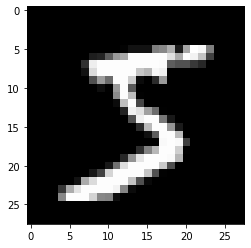

In [3]:
import matplotlib.pyplot as plt

# Show the first image:
plt.imshow(first_img, cmap="gray")

In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [6]:
batch_size = 128
epochs = 15

# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) 

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 33s 9ms/step - loss: 0.7636 - accuracy: 0.7648 - val_loss: 0.0752 - val_accuracy: 0.9815
Epoch 2/15
422/422 [==============================] - 3s 8ms/step - loss: 0.1185 - accuracy: 0.9641 - val_loss: 0.0547 - val_accuracy: 0.9842
Epoch 3/15
422/422 [==============================] - 3s 8ms/step - loss: 0.0856 - accuracy: 0.9732 - val_loss: 0.0517 - val_accuracy: 0.9865
Epoch 4/15
422/422 [==============================] - 3s 8ms/step - loss: 0.0734 - accuracy: 0.9773 - val_loss: 0.0418 - val_accuracy: 0.9882
Epoch 5/15
422/422 [==============================] - 3s 8ms/step - loss: 0.0655 - accuracy: 0.9791 - val_loss: 0.0391 - val_accuracy: 0.9890
Epoch 6/15
422/422 [==============================] - 4s 8ms/step - loss: 0.0584 - accuracy: 0.9810 - val_loss: 0.0371 - val_accuracy: 0.9903
Epoch 7/15
422/422 [==============================] - 4s 8ms/step - loss: 0.0531 - accuracy: 0.9830 - val_loss: 0.0353 - val_accuracy: 0.9905
Epoch

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.025150109082460403
Test accuracy: 0.9915000200271606


# Using the model for prediction

We show the shape of all the test images.

In [25]:
print(x_test.shape)

(10000, 28, 28, 1)


We get the first image and show its dimensions

In [26]:
first_img = x_test[0]
print(first_img.shape)

(28, 28, 1)


First, we reshape it just for visualization.

(28, 28)


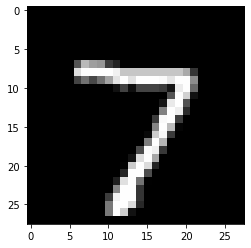

In [27]:
import matplotlib.pyplot as plt

first_img_vis = np.reshape(first_img, (28,28))
print(first_img_vis.shape)

# Show the first image:
plt.imshow(first_img_vis, cmap="gray")

In [28]:
first_img_res = np.reshape(first_img, (1, 28, 28, 1))
prediction = model.predict(first_img_res)
print(prediction)

[[3.6088646e-10 6.0397004e-10 2.0292337e-06 6.6275311e-07 3.2978649e-13
  8.6347186e-11 3.2261179e-17 9.9999678e-01 6.9672135e-09 4.7509866e-07]]


Show the index corresponding to the max value of the array

In [29]:
print(np.argmax(model.predict(first_img_reshaped)))

7
